# Coil Spring Design for the ASURT-FS17 Vehicle

### Design Approach

The design approach of a coil spring differs greatly with the available inputs and the required parameters. In our case in ASURT-FS we have two different approaches which differs in the required spring parameters:<br\>
- Specified maximum defflection and maximum load.
- Specified maximum load and required stiffness.<br\>

We may state the needs of the design as flollows:

- The coil should sustain the maximum load with an acceptable safety factor.
- The maximum elastic defflection of the spring should exceed the maximum applied defflection with an acceptable value.
- The spring should provide the required stifness.
- When assembled, the spring should provide a defflection that make the damper in its half stroke.
- The spring index should not be less than 3.5.
- The spring should be safe for buckling, fatigue, resonance.<br\>

Before breaking down these needs and discuss how can we accomplish them, we have to discuss the coil spring design parameters and how does these parameters affect our needs. This is best shown using a network-like graph:

From this illustration we may deduce the high dependency of each parameter on the others.<br\>
Lets start breaking down these needs and how can we achive them.<br\>

**_The coil should sustain the maximum load with an acceptable safety factor._** <br\>
The wire diameter is our output in this case, it can be evaluated using the following equation:<br\>
$$ d=\sqrt[\leftroot{0}\uproot{2}\scriptstyle 3]{\frac{8kF_{max}D_m}{\pi\tau_{al}}} $$
where:<br\>
  - $k$ is the stress-correction factor given by: $ k=\frac{4c+2}{4c-3} $<br\>
    , where $c$ is the spring index given by: $ c=D_m/d $
  - $F_{max}$ is the maximum force applied on the spring including a safety factor about 1.5.
  - $D_m$ is the mean diameter of the coil.
  - $ \tau_{al}$ is the allowable shear stress of the wire material which is given by: $ \tau_{al}=0.45\sigma_u$.<br\>

From this we note that in order to evaluate the wire diameter $d$ we have to evaluate the $k$ and $c$ factors which are depending on the wire diameter itself.<br\>
This requires making an initial guess of the spring index $c$ within the range $(8-12)$ and setting the value $D_m$ as a fraction of the inner diameter $D_{in}$ - _given from the damper geometry_ - then evaluate the $d$ from eq.1 and checkthe error with the vaule evaluated from $c=D_m/d$ in a **_ trail & error_** manner.<br\>
_This can be captured using a while loop as will be shown in the code implementation._<br\>
<br\>
<br\>
**_The spring should provide the required stifness._**<br\>
The spring stiffness can be evaluated based on the coil geometry by the following equation:<br\>
$$ k_s=\frac{d^4G}{8D_m^3n} $$
where:<br\>
  - $G$ is the shear modulus of rigidity of the coil material.
  - $n$ is the number of the active coils.<br\>
    
From this equation we can solve for $n$ in order to obtain the required stiffness.<br\>
  _ Note that the stiffness is also a function of the wire diameter $d$ and the mean coil diameter $D_m$.<br\>
We may need ocasionally to adjust the stiffness using these parameters if the required defflection is less than the available as will be discussed later._<br\>
<br\>
<br\>
**_The maximum elastic defflection of the spring should exceed the maximum applied defflection with an acceptable value._**<br\>


Here we should define what do we mean by the _required_ and the _available_ defflections. The required defflection value is the maximum defflection subjected on the spring during operation, where the maximum avaliable defflection is the defflection that the spring can provide without any permanent deformation.<br\> 
The spring defflection $y_{max}$ can be evaluated by:
$$y_{max}= \frac{\pi D_m^2n \tau_{al}}{kGd}$$


**_Remember:Stiffness,Load,Defflection relationship_**<br\>
We can only provide two parameters as requirements as the third one is dependent on the previous two. **_ An illustrative example_**, let's assume we want to design a spring that can sustain a load of 150 kg and provide a stiffness of 80 N/mm. This imply that the available defflection before any plastic deformation equals 18.4 mm. <br\>
**_WHY?!_** <br\>
This is because the defflection here is a function of a two major parameters that are evaluated based on the load and stiffness requirements, the wire diameter $d$ and the active turns $n$. So if we desire a bigger range of defflection this will enforce us to change either of these two parameters which will affect our initial requirements.<br\>
The least affecting change is to increase the load capacity of the coil by increasing the wire diameter $d$ and increasing the number of active turns $n$ to keep the same stiffness value, this will increase our defflection range with least effects on our desired stiffness. A drawback is the increase in wieght of the spring due to the increases in the number of turns and the coil diameter.<br\>
<br\>
<br\>
**_When assembled, the spring should provide a defflection that make the damper in its half stroke._**<br\>
This requirement can be divided into three situations:
- $\delta_{hs}=\frac{F_{cl}}{k_s}$.
- $\delta_{hs}<\frac{F_{cl}}{k_s}$.
- $\delta_{hs}>\frac{F_{cl}}{k_s}$.<br\>

where:
  - $\delta_{hs}$ is the damper half-stroke travel.
  - $F_{cl}$ is the corner load of the vehicle applied on the spring _taking into consideration the motion ratio_.
  - $k_s$ is the spring stiffness.<br\>
<br\>

In the first case $(\delta_{hs}=\frac{F_{cl}}{k_s})$ the static corner load $F_{cl}$ applied on the spring is suffecient to defflect the spring by a value equals to the $\delta_{hs}$. Therefore, no need for any applied preload -_other than a minimum load that keeps the spring firmly centered withinthe damper between its seats_-.<br\>

In the second case $(\delta_{hs}<\frac{F_{cl}}{k_s})$ the static corner load $F_{cl}$ applied on the spring is will result in a larger defflection in the spring than the required $\delta_{hs}$ which makes the damper having an unequal travel range in jounce and rebound -_in this case it will have more travel in rebound other than that in jounce_-.<br\>
What we need is to achieve the equality as in the first case. This can be captured in an equation form as $\delta_{hs}=(\frac{F_{cl}}{k_s})-(\frac{F_{pl}}{k_s})$. Where $F_{pl}$ is the preload required in the spring to react this excess defflection in the damper. This preload in obtained by defflecting the spring as it is assembled with the damper by a vlaue $\Delta=F_{pl}$ $/$ $k_s$. --->**_Needs more illustration_**<br\>
In order to solve for this, $\Delta = (F_{cl}$ $/$ $k_s) - \delta_{hs}$<br\>

In the third case $(\delta_{hs}>\frac{F_{cl}}{k_s})$ the static corner load $F_{cl}$ applied on the spring is not suffecient to defflect the spring by a value equals to the $\delta_{hs}$. This means that more load is required in order to defflect the spring and the damper together to be in the half stroke position.<br\>
Mathematically, we can follow the same approach in the second case which will lead to $\Delta =\delta_{hs} - (F_{cl}$ $/$ $k_s) $ which will leads to a negative defflection **-_extension_-** in the coil spring which is not applicable physically. --->**_Needs more illustration_**<br\>

From this we may conclude that the rquired minimum defflection is given by $y_{req}=2\delta_{hs}+\Delta$. <br\>

**_Important note:_** ---> disadvantage of 2nd case and the need of variable pitch to achive variable stiffness behavior.<br\>
<br\>
<br\>


## Calculation Steps and Code Implementation.

### Wire Mterial.
According to the manufacturer, the coil is made of a spring steel of **_grade c_** following the standard **DIN 17223-Part 1**.<br\>
The standard sorts the grades by the wire diameters available and its properties. The tensile strength of the material is a function of the wire diameter -_which is wierd_-, as the diameter increases, the tensile strength decreases.<br\>

For grade c, the wire diameters ranges from 2 mm to 20 mm with a variable step. Where the tensile strength ranges from 1160 MPa for the 20 mm diameter to 2200 MPa for the 2 mm diameter.<br\>

An average value of tensile strength was chosen as an initial chocie $\sigma_{u}=1470 $ MPa. As mentioned before, the allowable shear stress is a fraction of the tensile strength and recomended to be $\tau_{al}=0.45\sigma_u =661$ MPa.<br\>
The shear modulus of rigidity $G$ is dependent on the manufacturing process of the coil spring and is specified by the manufacturer as:
- $G= 83$ GPa for cold drawn wire.
- $G= 80$ GPa for hot drawn wire.<br\>

### Calculating wire diameter $d$.
As stated previously, the wire diameter is given by:<br\>

$$ d=\sqrt[\leftroot{0}\uproot{2}\scriptstyle 3]{\frac{8kF_{max}D_m}{\pi\tau_{al}}} $$

Now, we set our initial guess for the $k$ & $c$ factors in order to kick-start our calculation loop.<br\>

Assume the following:
- **_Guessd mean diameter_**, ($D_{m.g} = 1.15D_{in}$), where $D_{in}$ is given from the damper geometry.
- **_Guessd spring index_**, $c_g=10$, _based on the recommended range (8-12)_.
- **_Guessd wire diameter_**, $d_g=D_{m.g}/c_g$.
- **_Guessd correction factor_**, $ k_g=\frac{4c_g+2}{4c_g-3} $<br\>

Now, we evaluate the $d_{c,n}$ from the given equation and re-calculate the following:
- **_Calculated mean diameter_**, ($D_{m.c} = d_c+D_{in}$).
- **_Calculated spring index_**, $c_c=10$, _based on the recommended range (8-12)_.
- **_Calculated  correction factor_**, $ k_c=\frac{4c_c+2}{4c_c-3} $<br\>

**Note:** _the sup-scripts $(g,c,n)$ refere to guessed, calculated and the iteration step_ <br\>

After each step, we evaluate the error between $d_{c,n}$ and $d_{c,n-1}$, if it is outside our tolerance range we continue the loop, else, we break the loop and take $d=d_{c,n}$ rounded up to the nearest available wire diameter and re-calculate the $k$ and $c$ factors.<br\>

#### This is the piece of code for this purpose:

### Evaluating the number of active turns based on the required stiffness.

Now we calculate the required number of active turns $n_a$ in oerder to obtain the desired stiffness $k_s$ using the equation:
$$ n_a=\frac{d^4G}{8D_m^3k_s} $$
This number is then rounded off to a whole number or a number taht is a multiple of 0.5.<br\>
The resulted $k_s$ is then calculated after this rounding.

### Evaluating required Pre-load $F_{pl}$ and $\Delta$.
$\Delta = (F_{cl}$ $/$ $k_s) - \delta_{hs}$ <br\>
$F_{pl} = k_s \Delta$

### Evaluating the maximum srping elastic defflection $y_{max}$

Now we calculate the available maximum elastic defflection using the equation:
$$y_{max}= \frac{\pi D_m^2n \tau_{al}}{kGd}$$
This value is then compared with the required defflection $y_{req}$, where $y_{req}=\frac{F_{cl}}{k_s}+\delta_{hs}+\Delta$.<br\>

### Evaluating the spring length in operation $L_{cp}$, free-length $L$ and pitch $t$.

The length of the spring in the loaded condition is found by the formula:
$$ L_{cp} = t_{cp}(n_a-2)+d(n_{ic}+1)$$
where:
- $t_{cp}$ is the pitch in loaded condition. $t_{cp}=d+s$, ($d$ is the wire diameter and $s$ is a minimum clearance between active turns, specified at 0.3 to 1.0 $d$).
- $n_{ic}$ is the number of inactive turns. This depends on the ends type. In our case it is takes as 1.5 based on the manufacturer recommendation.<br\>

The free length is then calculated as:
$$L=L_{cp}+y_{max} $$

### Weight, Resonance, Stability.
**_To be ... _**

### Code

In [19]:
import numpy as np
from math import ceil
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import OrderedDict

In [3]:
import ipywidgets as wg
from IPython.display import display

In [4]:
def round_to(n, precision):
    correction = 0.5 if n >= 0 else -0.5
    return ceil( n/precision) * precision
def round_to_05(n):
    return round_to(n, 0.05)

In [14]:
# parameters

sigma=1470 # Ultimate tensile strength (MPa)
tau=sigma*0.45*10**6 # Allowable shear stress (Pa)
G=83*10**9 #Shear modulus of rigidity (Pa)
iic=1.5 #inactive turns
#===============================================================#
mr=0.6 #motion ratio
wheel_load=150 #kg
corner_load=80 #kg
F_cl=(corner_load*9.81)/mr
safety_factor=1.2
spring_force=safety_factor*(wheel_load*(9.81/mr)) #N
damper_defflection=30*10**-3 # damper stroke
#lf=145*10**-3 # spring free length
dInner=41*10**-3 #(m) spring inner diameter
stiffReq=64000 #(N/m)

#===============================================================#
#===============================================================#
cg=8 # Initial guess for spring index (Unitless) 
kg = ((4*cg)+2)/((4*cg)-3)
dMeanGuess = dInner*(1.15)# Guessed Mean diameter as a multible of the inner coil diameter (m)
dWireGuess = dMeanGuess/cg # calculated wire diameter form the spring index (m)
dWireCalc = ((kg*8*(spring_force)*dMeanGuess)/(np.pi*tau))**(1/3) # calculated wire diameter

# Coil wire diameter calculation
itr=0
while abs(dWireCalc-dWireGuess)>=0.0000001:
    print(itr,dWireGuess,dWireCalc)
    dMeanCalc = dWireCalc + dInner #Calculated Mean Diameter (m)
    cc = (dMeanCalc/dWireCalc) #calculated spring index
    kc = ((4*cc)+2)/((4*cc)-3)
    dWireGuess = dMeanCalc/cc 
    dWireCalc = ((kc*8*(spring_force)*dMeanCalc)/(np.pi*tau))**(1/3)
    itr+=1

# Rounding wire diameter up and re-evaluating parameters
dWireCalc=round_to(dWireCalc,0.0005)
dMeanCalc=dInner+dWireCalc
cc = (dMeanCalc/dWireCalc)
kc = ((4*cc)+2)/((4*cc)-3)
#===============================================================#
#===============================================================#
# Calculating the number of active coils based on the required stiffness.
i=(dWireCalc**4*G)/(8*dMeanCalc**3*stiffReq) # Active Coils
#i=round(i)

actualLoad=(np.pi*dWireCalc**3*tau)/(8*kc*dMeanCalc)
actualDeff = (np.pi*dMeanCalc**2*i*tau)/(kc*G*dWireCalc)
stiffCalc = (dWireCalc**4*G)/(8*dMeanCalc**3*i)
#===============================================================#
#===============================================================#
t_cp=1.25*dWireCalc # pitch of active turns at loaded condition
l_cp=(t_cp*(i-2))+(dWireCalc*(iic+1)) # length at loaded condition
lf=l_cp+actualDeff # free length
t=lf/(i+iic) # free pitch

delta=(F_cl/stiffCalc)-(damper_defflection/2) # required defflection for preload
y_req=(F_cl/stiffCalc)+delta+(damper_defflection/2) # total required defflection
#===============================================================#
#===============================================================#

if actualDeff<damper_defflection:
    print('Extending the allowable defflection')
    while actualDeff<damper_defflection:
        i=i+0.5
        actualDeff = (np.pi*dMeanCalc**2*i*tau)/(kc*G*dWireCalc)



# Re-evaluating after the adjustments
dWireCalc=round_to(dWireCalc,0.0005)
dMeanCalc=dInner+dWireCalc
cc = (dMeanCalc/dWireCalc)
kc = ((4*cc)+2)/((4*cc)-3)
actualLoad=(np.pi*dWireCalc**3*tau)/(8*kc*dMeanCalc)
actualDeff = (np.pi*dMeanCalc**2*i*tau)/(kc*G*dWireCalc)
stiffCalc = (dWireCalc**4*G)/(8*dMeanCalc**3*i)

#===============================================================#
#===============================================================#
area=np.pi*(dWireCalc**2/4)
length=np.pi*dMeanCalc*(i+iic)
volume=area*length
weight=(7.85*10**3)*volume # (gm)
frequency = (0.5*(2*np.pi)**-1)*np.sqrt(stiffCalc/weight) #Hz
stability = lf/dMeanCalc # should be <5

output=OrderedDict([('Wire Diameter (mm)',dWireCalc*10**3),('Mean Diameter (mm)',dMeanCalc*10**3),
        ('Outer Diameter (mm)',(dMeanCalc+dWireCalc)*10**3),('Number of Active turns',i),('Free Length (mm)',lf*10**3),
        ('Pitch (mm)',t*10**3),('Load Capacity (kg)',actualLoad/9.81),('Max. Defflection (mm)',actualDeff*10**3),
        ('Actual Stiffness (N/mm)',stiffCalc*10**-3),('Spring Index',cc),('Weight (gm)',weight*10**3),
        ('Stability Factor',stability),('Frequency',frequency)])

print("-------------------------------------")
for k,v in output.items():
    print("{:<30} {:<15} ".format(k,round(v,2)))
    print("-------------------------------------")

0 0.00589375 0.008555677018686484
1 0.008555677018686484 0.008881625854934615
2 0.008881625854934615 0.008922307365997566
3 0.008922307365997566 0.008927372647092043
4 0.008927372647092043 0.008928003140410484
0.04087500000000001
-------------------------------------
Wire Diameter (mm)             9.0             
-------------------------------------
Mean Diameter (mm)             50.0            
-------------------------------------
Outer Diameter (mm)            59.0            
-------------------------------------
Number of Active turns         8.51            
-------------------------------------
Free Length (mm)               142.69          
-------------------------------------
Pitch (mm)                     14.26           
-------------------------------------
Load Capacity (kg)             306.39          
-------------------------------------
Max. Defflection (mm)          46.96           
-------------------------------------
Actual Stiffness (N/mm)        64.0         

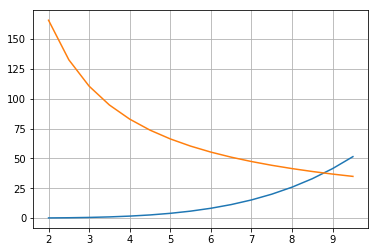

In [36]:
d=np.arange(2e-3,10e-3,0.5e-3)
G=83e9
d_m=59e-3
n=np.arange(2,10,0.5)
k_d = (d**4*G)/(8*d_m**3*8)
k_n = (0.009**4*G)/(8*d_m**3*n)
plt.plot(d*10**3,k_d*10**-3)
plt.plot(n,k_n*10**-3)
plt.grid()
plt.show()

In [5]:
# parameters

def Calculator(mr,wheel_load,lf,dInner,damper_defflection,sigma):
    #sigma=1470 # Ultimate tensile strength (MPa)
    tau=sigma*0.45*10**6 # Allowable shear stress (Pa)
    G=83*10**9 #Shear modulus of rigidity (Pa)
    #mr=0.6 #motion ratio
    #wheel_load=150 #kg
    spring_force=wheel_load*(9.81/mr) #N
    #damper_defflection=30*10**-3 # damper stroke
    #lf=145*10**-3 # spring free length
    #dInner=41*10**-3 #(m) spring inner diameter
    stiffReq=spring_force/damper_defflection #(N/m)


    cg=8 # Initial guess for spring index (Unitless) 
    kg = ((4*cg)+2)/((4*cg)-3)
    iic=1.5 # Initial guess for curvature factor (Unitless) 
    dMeanGuess = dInner*(1.15)# Guessed Mean diameter as a multible of the inner coil diameter (m)
    dWireGuess = dMeanGuess/cg # calculated wire diameter form the spring index (m)
    dWireCalc = ((kg*8*(spring_force)*dMeanGuess)/(np.pi*tau))**(1/3) # calculated wire diameter
    #print(kg,dMeanGuess,dWireGuess,dWireCalc)


    # Coil wire diameter calculation
    itr=0
    while abs(dWireCalc-dWireGuess)>=0.0000001:
        dMeanCalc = dWireCalc + dInner #Calculated Mean Diameter (m)
        cc = (dMeanCalc/dWireCalc) #calculated spring index
        kc = ((4*cc)+2)/((4*cc)-3)
        dWireGuess = dMeanCalc/cc 
        dWireCalc = ((kg*8*(spring_force)*dMeanCalc)/(np.pi*tau))**(1/3)
        itr+=1

    # Rounding wire diameter up and re-evaluating parameters
    dWireCalc=round_to(dWireCalc,0.0005)
    dMeanCalc=dInner+dWireCalc
    cc = (dMeanCalc/dWireCalc)
    kc = ((4*cc)+2)/((4*cc)-3)

    # Calculating the appropriate pitch based on the desired stiffness 
    # and the desired free length
    i=round((dWireCalc**4*G)/(8*dMeanCalc**3*stiffReq)) # Active Coils
    t=lf/(i+1.5) # free pitch
    t_req=0.45*(dMeanCalc+dWireCalc)

    actualLoad=(np.pi*dWireCalc**3*tau)/(8*kc*dMeanCalc)
    actualDeff = (np.pi*dMeanCalc**2*i*tau)/(kc*G*dWireCalc)
    stiffCalc = (dWireCalc**4*G)/(8*dMeanCalc**3*i)

    if actualDeff<damper_defflection:
        #print('Extending the allowable defflection')
        while actualDeff<damper_defflection:
            i=i+0.5
            actualDeff = (np.pi*dMeanCalc**2*i*tau)/(kc*G*dWireCalc)

    if t>t_req:
        #print("Adjusting pitch")
        itr2=0
        while t>t_req:
            dWireCalc=dWireCalc+(0.5*10**-3)
            dMeanCalc=dInner+dWireCalc
            i=round_to((dWireCalc**4*G)/(8*dMeanCalc**3*stiffReq),0.5)
            t=lf/(i+1.5)
            t_req=0.45*(dMeanCalc+dWireCalc)
            itr2+=1

    # Re-evaluating after the adjustments
    dWireCalc=round_to(dWireCalc,0.0005)
    dMeanCalc=dInner+dWireCalc
    cc = (dMeanCalc/dWireCalc)
    kc = ((4*cc)+2)/((4*cc)-3)
    actualLoad=(np.pi*dWireCalc**3*tau)/(8*kc*dMeanCalc)
    actualDeff = (np.pi*dMeanCalc**2*i*tau)/(kc*G*dWireCalc)
    stiffCalc = (dWireCalc**4*G)/(8*dMeanCalc**3*i)

    area=np.pi*(dWireCalc**2/4)
    length=np.pi*dMeanCalc*(i+iic)
    volume=area*length
    weight=(7.85*10**3)*volume # (gm)
    frequency = (0.5*(2*np.pi)**-1)*np.sqrt(stiffCalc/weight) #Hz
    stability = lf/dMeanCalc # should be <5

    output=OrderedDict([('Wire Diameter (mm)',dWireCalc*10**3),('Mean Diameter (mm)',dMeanCalc*10**3),
            ('Outer Diameter (mm)',(dMeanCalc+dWireCalc)*10**3),('Free Length (mm)',lf*10**3),
            ('Pitch (mm)',t*10**3),('Load Capacity (kg)',actualLoad/9.81),('Max. Defflection (mm)',actualDeff*10**3),
            ('Actual Stiffness (N/mm)',stiffCalc*10**-3),('Spring Index',cc),('Weight (gm)',weight*10**3),
            ('Stability Factor',stability),('Frequency',frequency)])

    print("-------------------------------------")
    for k,v in output.items():
        print("{:<30} {:<15} ".format(k,round(v,2)))
        print("-------------------------------------")

In [6]:
wg.interact(Calculator,mr=wg.FloatSlider(min=0.3,max=1.1,value=0.6,step=0.01),
                       wheel_load=wg.IntSlider(min=75,max=160,value=150,step=5),
                       lf=wg.FloatSlider(min=130*10**-3,max=160*10**-3,value=140*10**-3,step=1*10**-3),
                       dInner=wg.FloatSlider(min=30*10**-3,max=60*10**-3,value=41*10**-3,step=1*10**-3),
                        damper_defflection=wg.FloatSlider(min=20*10**-3,max=70*10**-3,value=30*10**-3,step=1*10**-3),
                        sigma=wg.FloatSlider(min=1300,max=1700,value=1470,step=10));

-------------------------------------
Wire Diameter (mm)             8.5             
-------------------------------------
Mean Diameter (mm)             49.5            
-------------------------------------
Outer Diameter (mm)            58.0            
-------------------------------------
Free Length (mm)               140.0           
-------------------------------------
Pitch (mm)                     21.54           
-------------------------------------
Load Capacity (kg)             263.59          
-------------------------------------
Max. Defflection (mm)          31.85           
-------------------------------------
Actual Stiffness (N/mm)        81.19           
-------------------------------------
Spring Index                   5.82            
-------------------------------------
Weight (gm)                    484.9           
-------------------------------------
Stability Factor               2.83            
-------------------------------------
Frequency       